# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from lifelines.utils import concordance_index
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
data = pd.read_csv("heart_attack.csv")
data

,ID,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status
0,3577889,Adult,Female,Hispanic,Former Smoker,NaN,Average,138,100,37.7,124,Low,0,0,Good,High,7.3,80,0
1,4993933,Adult,Male,Hispanic,Non-smoker,Moderate,Excellent,238,150,39.0,182,Low,1,0,Good,Medium,7.8,85,0
2,4094901,Adult,Male,Hispanic,Non-smoker,Moderate,Poor,164,106,20.7,191,Moderate,1,1,Good,Low,5.2,61,0
3,4420498,Youth,Male,White,Non-smoker,NaN,Excellent,158,110,37.7,36,Low,1,0,Good,Medium,8.4,56,1
4,634466,Adult,Male,Black,Non-smoker,NaN,Excellent,282,118,30.3,237,Low,0,1,Good,Low,6.7,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3607374,Adult,Female,Native American,Current Smoker,Moderate,Excellent,276,122,26.4,22,Moderate,0,1,Moderate,Low,8.1,66,1
99996,2402603,Adult,Female,Native American,Non-smoker,NaN,Average,225,127,23.7,203,Moderate,0,1,Good,High,7.9,94,0
99997,4732446,Adult,Male,White,Non-smoker,Moderate,Average,150,130,21.5,229,High,0,0,Moderate,Low,7.4,91,1
99998,4692152,Adult,Female,Asian,Former Smoker,Moderate,Average,220,165,28.5,30,Moderate,0,1,Unhealthy,Low,8.6,52,0


In [6]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100000 non-null  int64  
 1   Age_Group            100000 non-null  object 
 2   Gender               100000 non-null  object 
 3   Ethnicity            100000 non-null  object 
 4   Smoking_Status       100000 non-null  object 
 5   Alcohol_Consumption  60008 non-null   object 
 6   Diet_Quality         100000 non-null  object 
 7   Cholesterol_Level    100000 non-null  int64  
 8   Blood_Pressure       100000 non-null  int64  
 9   BMI                  100000 non-null  float64
 10  Physical_Activity    100000 non-null  int64  
 11  Stress_Level         100000 non-null  object 
 12  Family_History       100000 non-null  int64  
 13  Diabetes             100000 non-null  int64  
 14  Air_Quality_Index    100000 non-null  object 
 15

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
data.shape[0]

100000

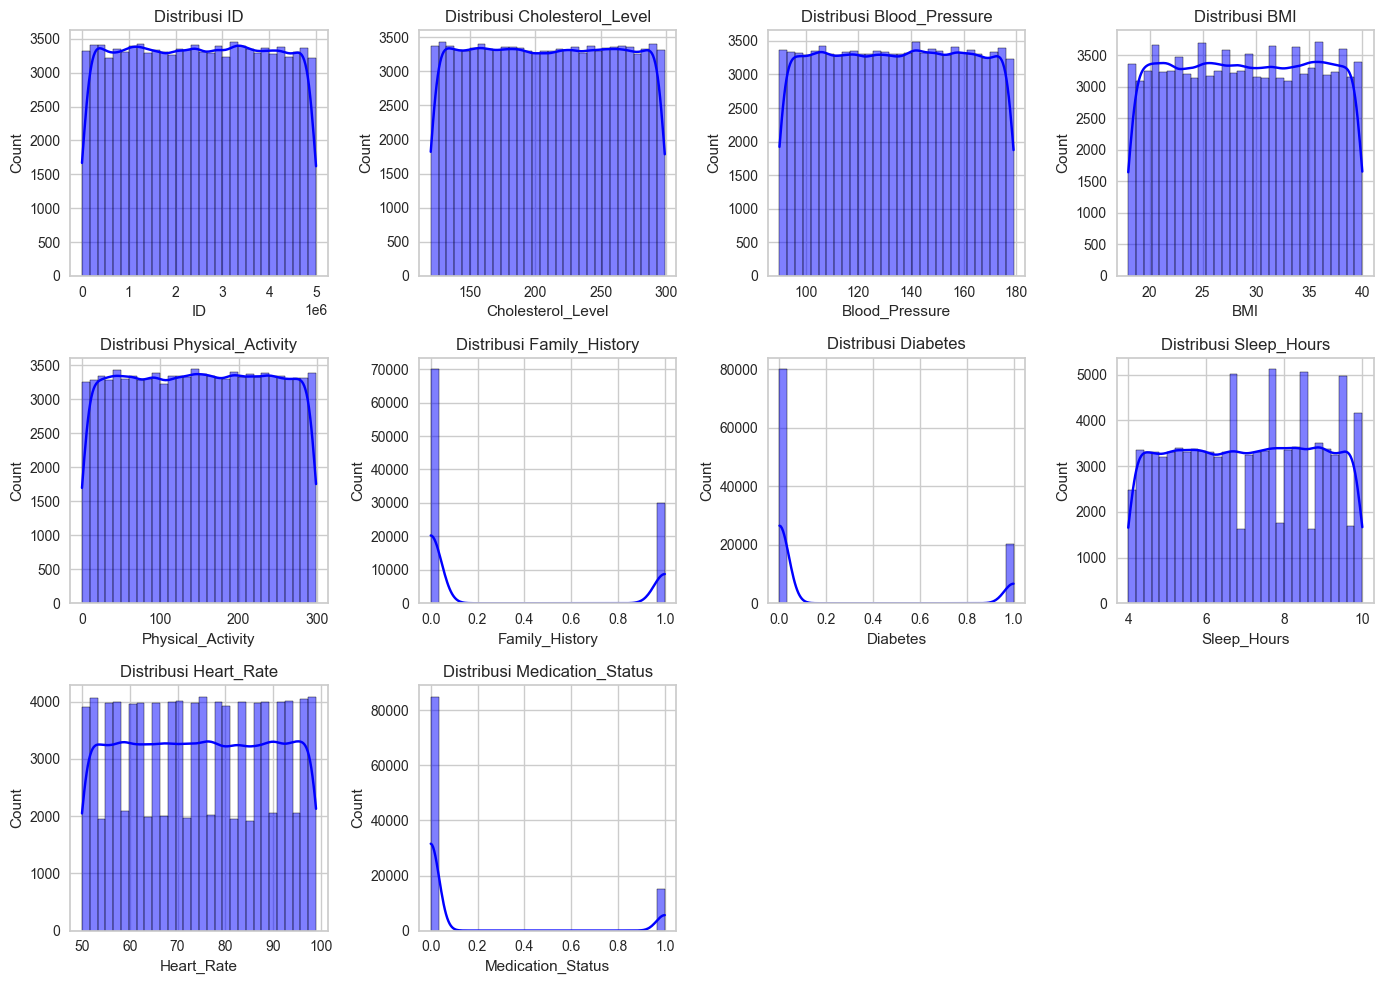

In [8]:
# EDA untuk Distribusi data numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

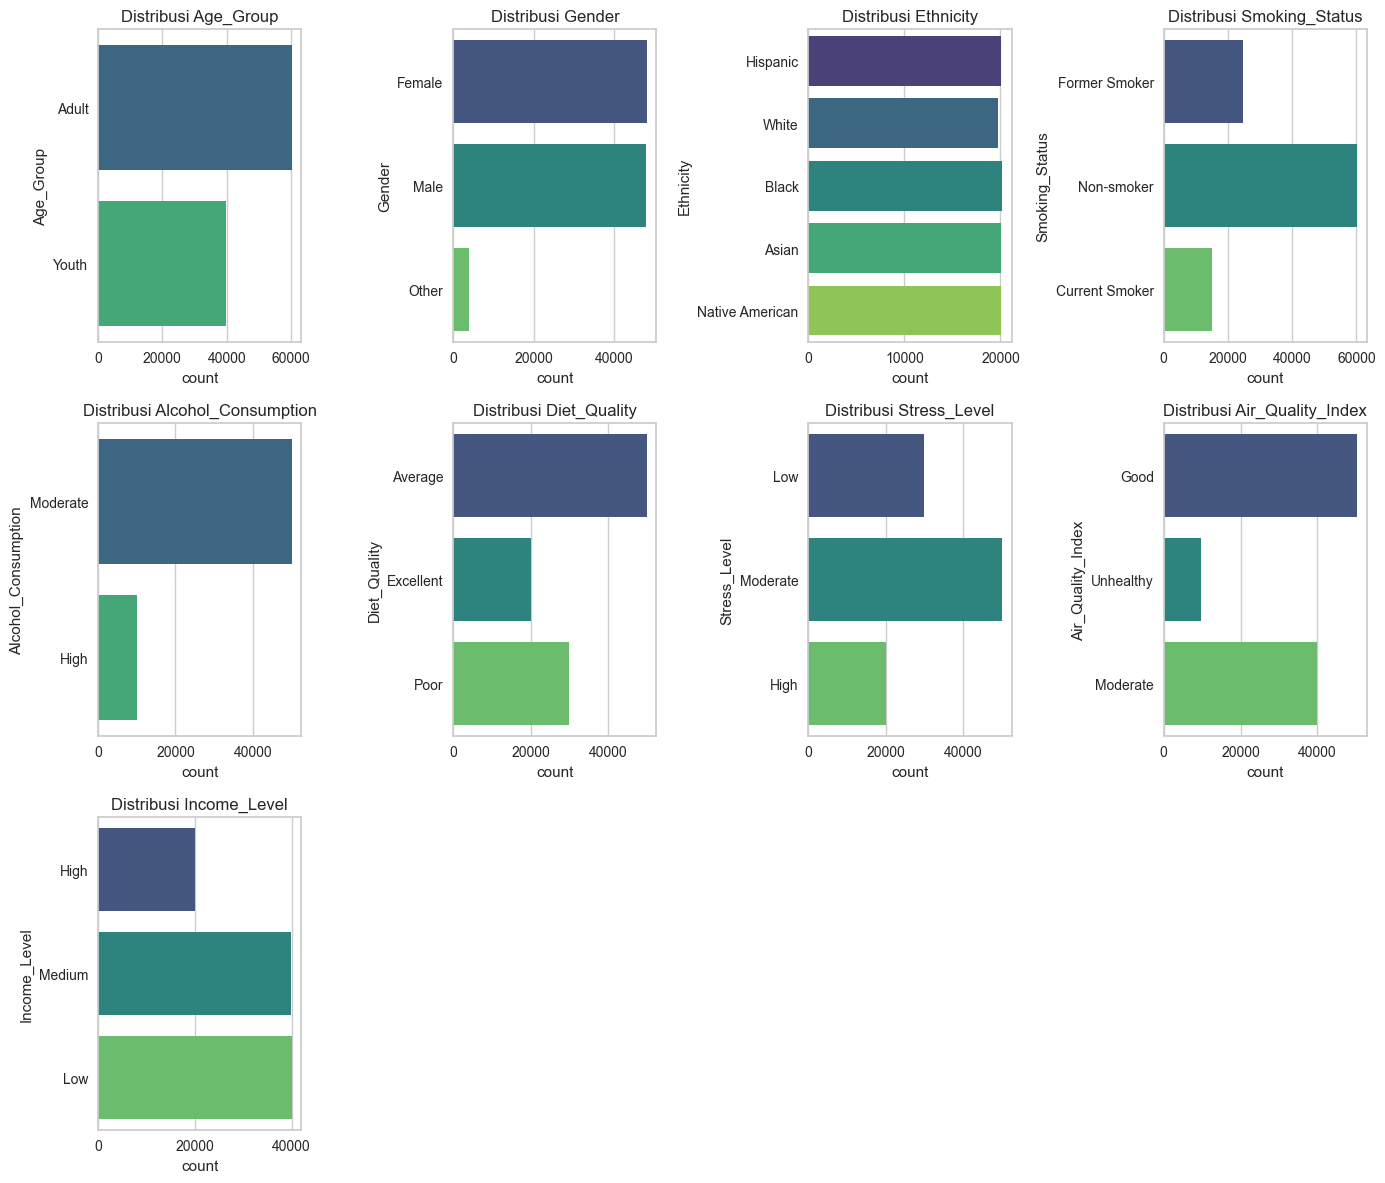

In [9]:
# EDA untuk Distribusi data kategorik
cat_features = data.select_dtypes(include=[object])
num_features = len(cat_features.columns)

rows = math.ceil(num_features / 4) 
plt.figure(figsize=(14, 4 * rows)) 

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(rows, 4, i)
    sns.countplot(y=data[column], hue=data[column], palette='viridis', legend=False)
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

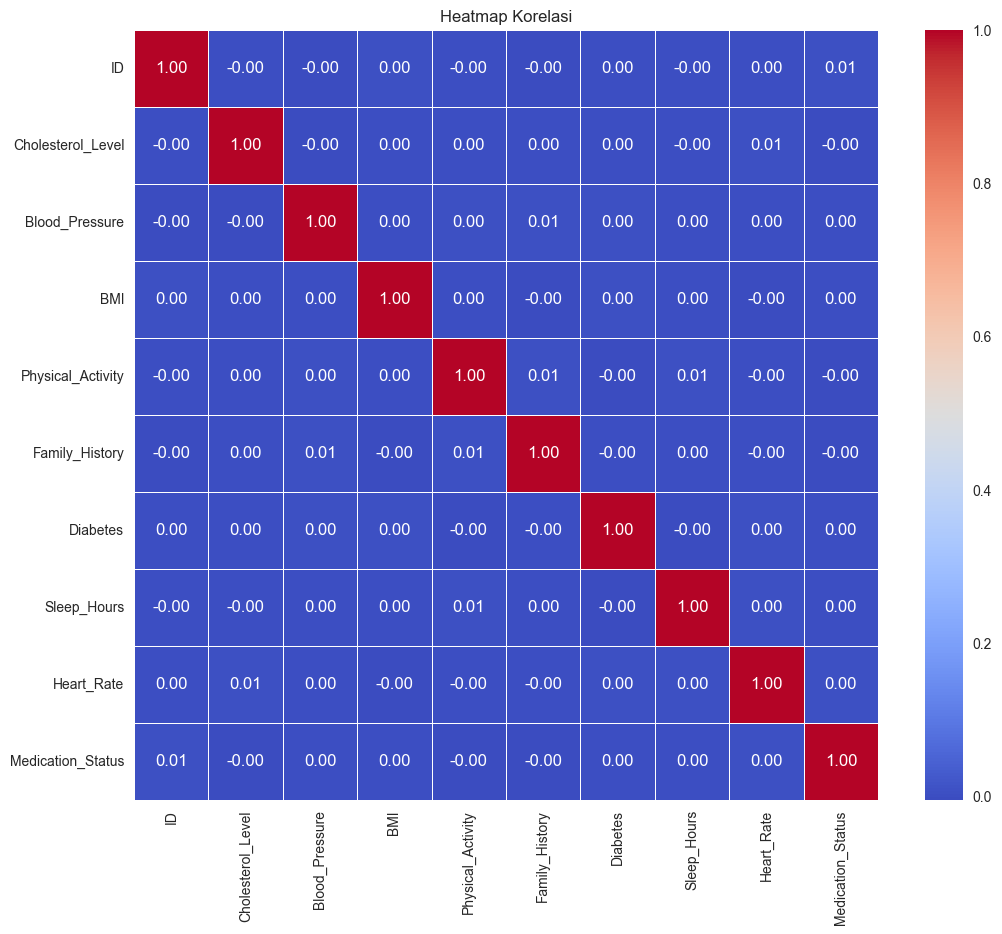

In [10]:
# Heatmap korelasi untuk fitur numerik
num_features = data.select_dtypes(include=[int, float])

plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()  # Hitung korelasi pada DataFrame numerik
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [11]:
# Cek apakah ada data yang kosong
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
ID                         0
Age_Group                  0
Gender                     0
Ethnicity                  0
Smoking_Status             0
Alcohol_Consumption    39992
Diet_Quality               0
Cholesterol_Level          0
Blood_Pressure             0
BMI                        0
Physical_Activity          0
Stress_Level               0
Family_History             0
Diabetes                   0
Air_Quality_Index          0
Income_Level               0
Sleep_Hours                0
Heart_Rate                 0
Medication_Status          0
dtype: int64


In [13]:
data.head()

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status
0,Adult,Female,Hispanic,Former Smoker,NaN,Average,138,100,37.7,124,Low,0,0,Good,High,7.3,80,0
1,Adult,Male,Hispanic,Non-smoker,Moderate,Excellent,238,150,39.0,182,Low,1,0,Good,Medium,7.8,85,0
2,Adult,Male,Hispanic,Non-smoker,Moderate,Poor,164,106,20.7,191,Moderate,1,1,Good,Low,5.2,61,0
3,Youth,Male,White,Non-smoker,NaN,Excellent,158,110,37.7,36,Low,1,0,Good,Medium,8.4,56,1
4,Adult,Male,Black,Non-smoker,NaN,Excellent,282,118,30.3,237,Low,0,1,Good,Low,6.7,78,0


In [12]:
# Hapus data yang tidak digunakan dalam pemodelan Clustering
data.drop(columns=["ID"], inplace=True)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# Karena data yang kosong hanya 39,992% dari data maka kita akan isi data yang kosong dengan nilai yang paling banyak keluar
for column in data.columns:
    most_frequent_value = data[column].mode()[0]  
    data[column] = data[column].fillna(most_frequent_value)

In [15]:
# Cek apakah data kita terdapat outliers atau tidak
numerical_data = data.select_dtypes(include=[np.number])
z_scores = numerical_data.apply(zscore)

for col in z_scores.columns:
    outliers = data[z_scores[col].abs() > 3]
    print(f"Outliers di kolom '{col}':")
    print(outliers if not outliers.empty else "Tidak ada outliers")

Outliers di kolom 'Cholesterol_Level':
Tidak ada outliers
Outliers di kolom 'Blood_Pressure':
Tidak ada outliers
Outliers di kolom 'BMI':
Tidak ada outliers
Outliers di kolom 'Physical_Activity':
Tidak ada outliers
Outliers di kolom 'Family_History':
Tidak ada outliers
Outliers di kolom 'Diabetes':
Tidak ada outliers
Outliers di kolom 'Sleep_Hours':
Tidak ada outliers
Outliers di kolom 'Heart_Rate':
Tidak ada outliers
Outliers di kolom 'Medication_Status':
Tidak ada outliers


In [16]:
data.select_dtypes(include=["object"]).columns

Index(['Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status',
       'Alcohol_Consumption', 'Diet_Quality', 'Stress_Level',
       'Air_Quality_Index', 'Income_Level'],
      dtype='object')

In [17]:
data.select_dtypes(include=["object"])

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Stress_Level,Air_Quality_Index,Income_Level
0,Adult,Female,Hispanic,Former Smoker,Moderate,Average,Low,Good,High
1,Adult,Male,Hispanic,Non-smoker,Moderate,Excellent,Low,Good,Medium
2,Adult,Male,Hispanic,Non-smoker,Moderate,Poor,Moderate,Good,Low
3,Youth,Male,White,Non-smoker,Moderate,Excellent,Low,Good,Medium
4,Adult,Male,Black,Non-smoker,Moderate,Excellent,Low,Good,Low
...,...,...,...,...,...,...,...,...,...
99995,Adult,Female,Native American,Current Smoker,Moderate,Excellent,Moderate,Moderate,Low
99996,Adult,Female,Native American,Non-smoker,Moderate,Average,Moderate,Good,High
99997,Adult,Male,White,Non-smoker,Moderate,Average,High,Moderate,Low
99998,Adult,Female,Asian,Former Smoker,Moderate,Average,Moderate,Unhealthy,Low


In [38]:
# Encode data kategorikal seperti Age_Group, Gender, Income_Level
label_encoder = LabelEncoder()

categorical_columns = ['Age_Group', 'Gender', 'Stress_Level', 'Diet_Quality', 'Alcohol_Consumption', 'Smoking_Status']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    
data.head()

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Cluster
0,0,0,Hispanic,1,1,0,138,100,37.7,124,1,0,0,Good,High,7.3,80,0,0
1,0,1,Hispanic,2,1,1,238,150,39.0,182,1,1,0,Good,Medium,7.8,85,0,2
2,0,1,Hispanic,2,1,2,164,106,20.7,191,2,1,1,Good,Low,5.2,61,0,0
3,1,1,White,2,1,1,158,110,37.7,36,1,1,0,Good,Medium,8.4,56,1,0
4,0,1,Black,2,1,1,282,118,30.3,237,1,0,1,Good,Low,6.7,78,0,2


In [19]:
data.columns

Index(['Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status',
       'Alcohol_Consumption', 'Diet_Quality', 'Cholesterol_Level',
       'Blood_Pressure', 'BMI', 'Physical_Activity', 'Stress_Level',
       'Family_History', 'Diabetes', 'Air_Quality_Index', 'Income_Level',
       'Sleep_Hours', 'Heart_Rate', 'Medication_Status'],
      dtype='object')

In [52]:
# Normalisasi data Numerik dan target yang akan di prediksi
numerical_features =data[['Blood_Pressure', 'Alcohol_Consumption']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 3
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(scaled_features, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_indices = labels == cluster_id
        cluster_data = scaled_features[cluster_indices]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_blood_pressure = cluster_data[:, 0].mean()
        mean_alcohol_consumption = cluster_data[:, 1].mean()
        # mean_smoking_status = cluster_data[:, 0].mean()
        # mean_cholesterol = cluster_data[:, 1].mean()
        # mean_bmi = cluster_data[:, 2].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Tekanan Darah : {mean_blood_pressure:.2f}")
        print(f"Rata-rata Konsumsi Alkohol : {mean_alcohol_consumption:.2f}")
        # print(f"Rata-rata BMI : {mean_bmi:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(scaled_features, labels, k=3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Tekanan Darah : -0.87
Rata-rata Konsumsi Alkohol : 0.33

Cluster 2:
Rata-rata Tekanan Darah : 0.86
Rata-rata Konsumsi Alkohol : 0.33

Cluster 3:
Rata-rata Tekanan Darah : 0.00
Rata-rata Konsumsi Alkohol : -3.01


In [56]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
kmeans.fit(scaled_features)
labels = kmeans.labels_ 
print(labels)

data['Cluster'] = clusters

[0 1 0 ... 0 1 1]


In [57]:
for i in range(k):
    print(f"Cluster {i}")
    print(data[data['Cluster'] == i].describe())

Cluster 0
          Age_Group        Gender  Smoking_Status  Alcohol_Consumption  \
count  43950.000000  43950.000000    43950.000000              43950.0   
mean       0.402662      0.559249        1.455973                  1.0   
std        0.490439      0.571558        0.736422                  0.0   
min        0.000000      0.000000        0.000000                  1.0   
25%        0.000000      0.000000        1.000000                  1.0   
50%        0.000000      1.000000        2.000000                  1.0   
75%        1.000000      1.000000        2.000000                  1.0   
max        1.000000      2.000000        2.000000                  1.0   

       Diet_Quality  Cholesterol_Level  Blood_Pressure           BMI  \
count  43950.000000       43950.000000    43950.000000  43950.000000   
mean       0.799340         209.418180      111.471126     29.005288   
std        0.871312          52.198749       12.694350      6.366476   
min        0.000000         120.000

In [24]:
# Menghitung rata-rata setiap fitur per cluster
data['Cluster'] = labels

cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Age_Group    Gender  Alcohol_Consumption  Diet_Quality  \
Cluster                                                           
0         0.402662  0.559249                  1.0      0.799340   
1         0.393113  0.556720                  1.0      0.801523   
2         0.398635  0.565937                  0.0      0.795464   

         Cholesterol_Level  Blood_Pressure        BMI  Physical_Activity  \
Cluster                                                                    
0               209.418180      111.471126  29.005288         149.665643   
1               209.265916      156.412728  29.015996         150.311678   
2               209.527198      134.480530  28.974890         147.906664   

         Stress_Level  Family_History  Diabetes  Sleep_Hours  Heart_Rate  \
Cluster                                                                    
0            1.297952        0.300341  0.200250     7.011092   74.605438   
1            1.305364        0.302152  0.201645     7.0

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

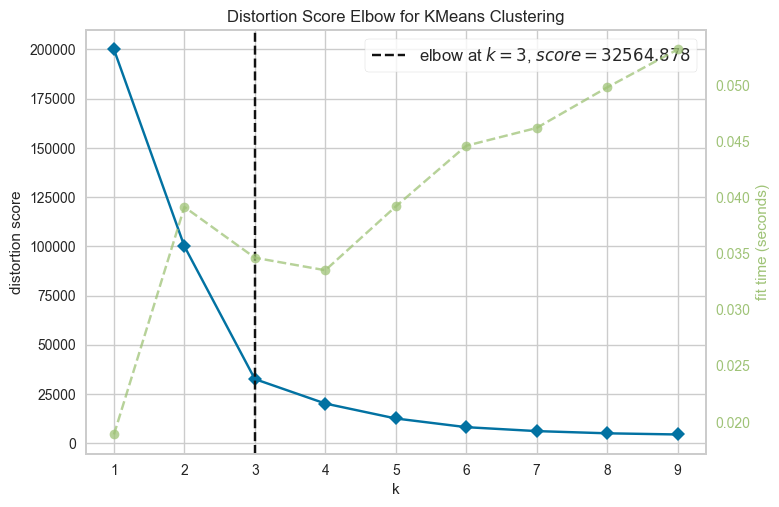

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Menggunakan algoritma KMEANS untuk memprediksi hubungan tekanan darah dan konsumsi alkohol dengan diabetes
kmeans = KMeans()
 
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
visualizer.fit(scaled_features)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_features)
score = silhouette_score(scaled_features, labels)
print(f'k={k}, Silhouette Score={score}')

k=3, Silhouette Score=0.6300981845144544


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

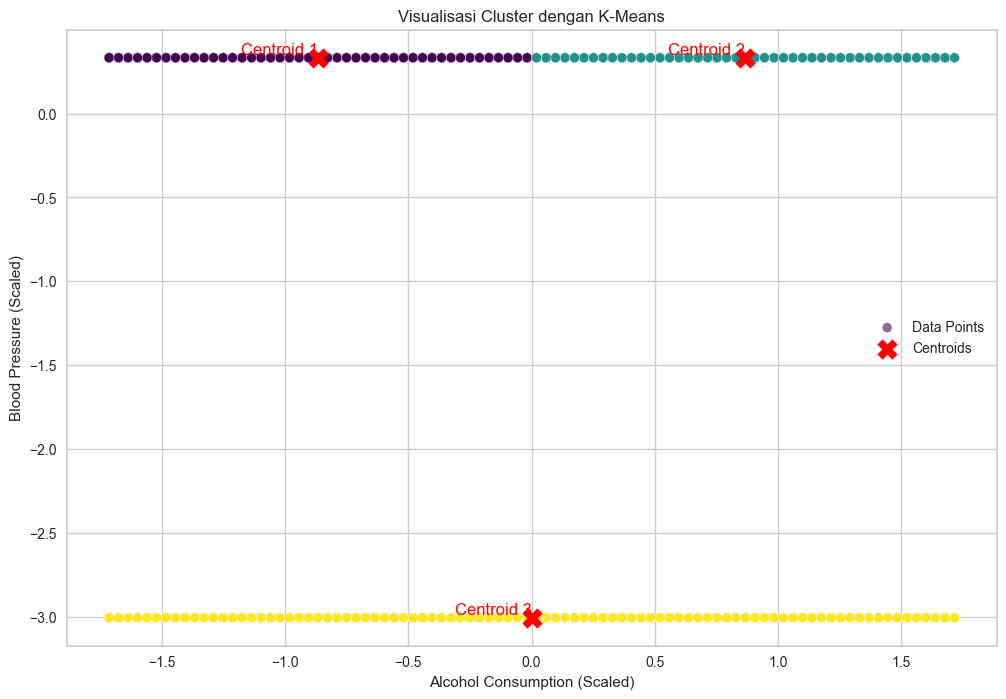

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

plt.xlabel('Alcohol Consumption (Scaled)')
plt.ylabel('Blood Pressure (Scaled)')

plt.title('Visualisasi Cluster dengan K-Means')

plt.legend()

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Analisis Karakteristik Setiap Cluster:**

**Cluster 1:**
- Rata-rata Tekanan Darah: -0.87
- Rata-rata Konsumsi Alkohol: 0.33

**Cluster 2:**
- Rata-rata Tekanan Darah: 0.86
- Rata-rata Konsumsi Alkohol: 0.33

**Cluster 3:**
- Rata-rata Tekanan Darah: 0.00
- Rata-rata Konsumsi Alkohol: -3.01

**Hasil Interpretasi :**

**1. Cluster 1 :** 
- Tekanan Darah: Rendah (nilai -0.87 menunjukkan tekanan darah di bawah rata-rata).
- Konsumsi Alkohol: Sedikit di atas rata-rata (nilai 0.33).
- Kesimpulan:
Individu dalam cluster ini memiliki tekanan darah yang rendah, yang umumnya mengurangi risiko serangan jantung. Namun, konsumsi alkohol yang sedikit di atas rata-rata dapat menjadi faktor risiko moderat. Meskipun tekanan darah rendah cenderung melindungi dari serangan jantung, konsumsi alkohol yang meningkat dapat memengaruhi kesehatan jantung dalam jangka panjang.

**2. Cluster 2 :** 
- Tekanan Darah: Tinggi (nilai 0.86 menunjukkan tekanan darah di atas rata-rata).
- Konsumsi Alkohol: Sedikit di atas rata-rata (nilai 0.33).
- Kesimpulan:
Individu dalam cluster ini memiliki tekanan darah tinggi, yang merupakan faktor risiko utama serangan jantung. Kombinasi tekanan darah tinggi dan konsumsi alkohol yang sedikit meningkat dapat memperburuk risiko kesehatan jantung.

**3. Cluster 3 :** 
- Tekanan Darah: Normal (nilai 0.00 menunjukkan tekanan darah rata-rata).
- Konsumsi Alkohol: Sangat rendah (nilai -3.01 menunjukkan konsumsi alkohol jauh di bawah rata-rata).
- Kesimpulan:
Individu dalam cluster ini memiliki tekanan darah normal dan konsumsi alkohol yang sangat rendah. Kombinasi ini menunjukkan gaya hidup yang relatif sehat, yang dapat mengurangi risiko serangan jantung.


**Evaluasi Keseluruhan:**

- **Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis?**
    - Ya, hasil clustering menunjukkan pola yang sesuai dengan pengetahuan medis tentang faktor risiko serangan jantung. Tekanan darah tinggi dan konsumsi alkohol yang meningkat (seperti pada Cluster 2) dikaitkan dengan risiko serangan jantung yang lebih tinggi, sementara tekanan darah rendah atau normal dan konsumsi alkohol rendah (seperti pada Cluster 1 dan 3) dikaitkan dengan risiko yang lebih rendah.

- **Apakah ada pola tertentu yang bisa dimanfaatkan?**
    - Cluster 2 memerlukan intervensi kesehatan yang lebih intensif, seperti program pengelolaan tekanan darah dan edukasi tentang bahaya konsumsi alkohol.
    - Cluster 1 dapat fokus pada pemantauan tekanan darah dan pengurangan konsumsi alkohol.
    - Cluster 3 dapat dijadikan contoh untuk mempromosikan gaya hidup sehat, karena mereka memiliki risiko serangan jantung yang relatif rendah.

Dengan demikian, hasil clustering ini dapat digunakan untuk merancang strategi pencegahan serangan jantung yang lebih terarah berdasarkan karakteristik masing-masing cluster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [59]:
data.to_csv('hasil_clustering.csv', index=False)